In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("placement.csv")

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123,1
1,1,5.9,106,0
2,2,5.3,121,1
3,3,7.4,132,1
4,4,5.8,142,1


#### Steps
1. Preprocess + EDA + Feature Selection
2. Extract input and output cols
3. Train test split
4. Scale the values
5. Train the model
6. Evaluate the model
7. Deploy the model

#### Step 1: Preprocess + EDA + Feature Selection
Pre-processing includes identifying and handling missing values, outliers, etc.  
EDA (Exploratory Data Analysis) usually involves plotting graphs and charts to understand the data.  
Feature Selection involves determining which columns are going to help us predict the output.

In [4]:
df.info() #For simplicity we have a clean data with no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    int64  
 3   placement   100 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 KB


In [5]:
df = df.iloc[:,1:] #We remove the unnecessary columns

In [6]:
df.head()

,cgpa,iq,placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,1
3,7.4,132,1
4,5.8,142,1


In [7]:
import matplotlib.pyplot as plt 

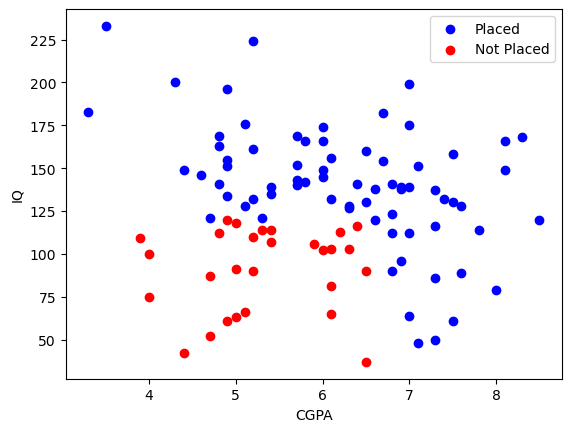

In [8]:
#We will use a scatter plot for EDA
plt.scatter(df[df['placement'] == 1]['cgpa'], df[df['placement'] == 1]['iq'], c='blue', label='Placed')
plt.scatter(df[df['placement'] == 0]['cgpa'], df[df['placement'] == 0]['iq'], c='red', label='Not Placed')
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.legend()

In [9]:
#The EDA lets us know that this seems to be like a classication problem and so we can use logistic regression to solve this problem

#### Step 2: Extract input and output cols

In [10]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [11]:
X

,cgpa,iq
0,6.8,123
1,5.9,106
2,5.3,121
3,7.4,132
4,5.8,142
...,...,...
95,4.3,200
96,4.4,42
97,6.7,182
98,6.3,103


In [12]:
y

0     1
1     0
2     1
3     1
4     1
     ..
95    1
96    0
97    1
98    0
99    0
Name: placement, Length: 100, dtype: int64

#### Step 3: Train test split
Here we divide our data into training and testing sets ensuring that our model is not exposed to the testing data. The ratio of training and testing data usually should be around 80:20. Also more is the training data, better is the model performance.  
Since we are using a small dataset, we will keep the ratio 90:10

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1,random_state=1)
#randow_state ensures that we get the exact rows in our datasets every time we run this command 

In [14]:
X_train #input for training data

,cgpa,iq
92,5.2,110
39,4.6,146
56,6.1,65
52,7.0,175
51,4.8,141
...,...,...
75,4.8,169
9,5.1,66
72,7.3,116
12,5.4,139


In [15]:
X_test #input for testing data

,cgpa,iq
80,4.9,196
84,5.7,169
33,6.0,149
81,5.4,107
93,6.8,112
17,3.3,183
36,5.7,140
82,6.5,37
69,8.5,120
65,8.1,166


In [16]:
y_train #Output for training data

92    0
39    1
56    0
52    1
51    1
     ..
75    1
9     0
72    1
12    1
37    1
Name: placement, Length: 90, dtype: int64

#### Step 4: Scale the values
Scaling the values involves bringing all inputs to similar range, since few algorithms are distance based, they can result in errorneous values when the input columns are having very different ranges. For example age (0-100) and salary (in lacs)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
X_train = scaler.fit_transform(X_train)

In [19]:
X_train

array([[-0.70920814, -0.39085938],
       [-1.25475287,  0.54789851],
       [ 0.10910895, -1.56430673],
       [ 0.92742603,  1.30412013],
       [-1.07290463,  0.41751547],
       [ 0.92742603,  0.36536225],
       [-1.89122172, -0.41693599],
       [ 1.38204664, -1.66861317],
       [ 0.10910895, -1.14708101],
       [ 0.01818482,  0.5218219 ],
       [-0.61828402, -0.10401669],
       [-0.98198051, -1.66861317],
       [ 0.65465367,  1.48665639],
       [ 0.01818482, -0.59947224],
       [-0.70920814,  0.182826  ],
       [ 0.74557779, -0.91239154],
       [-1.16382875, -1.90330264],
       [ 0.01818482,  1.27804353],
       [-0.61828402, -0.28655295],
       [ 0.47280543,  0.91297102],
       [-0.89105639, -0.18224652],
       [ 0.20003307, -0.31262955],
       [ 0.38188131,  0.41751547],
       [-1.52752523,  1.95603533],
       [-1.43660111,  0.62612833],
       [-0.98198051,  0.23497921],
       [ 0.56372955,  0.33928564],
       [-1.07290463, -0.33870616],
       [-1.16382875,

In [20]:
X_test = scaler.transform(X_test)

In [21]:
X_test

array([[-0.98198051,  1.8517289 ],
       [-0.25458754,  1.14766049],
       [ 0.01818482,  0.62612833],
       [-0.5273599 , -0.4690892 ],
       [ 0.74557779, -0.33870616],
       [-2.43676644,  1.512733  ],
       [-0.25458754,  0.39143886],
       [ 0.47280543, -2.29445175],
       [ 2.29128785, -0.1300933 ],
       [ 1.92759136,  1.06943066]])

#### Step 5: Train the model
The EDA lets us know that this seems to be like a classication problem and so we can use logistic regression to solve this problem

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
clf = LogisticRegression()

In [24]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

#### Step 6: Model Evaluation
Model selection / evaluation involves building models using different types of algorithms and then determining which one is giving us the best results.

In [25]:
y_pred = clf.predict(X_test) #This is the prediction given by our model
y_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

In [26]:
y_test #These were our original values

80    1
84    1
33    1
81    0
93    1
17    1
36    1
82    0
69    1
65    1
Name: placement, dtype: int64

In [28]:
from sklearn.metrics import accuracy_score # Using this we will calculate the accuracy of our model

In [29]:
accuracy_score(y_test,y_pred) 
#Since this was a pretty simple dataset, without any outliers, our accuracy came out to be 100%
#Ideally the accuracy of a good model can vary from 90% to 99% depending on the quality and quantity of our training data

1.0

In [30]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train.values, clf=clf, legends = 2)

ModuleNotFoundError: No module named 'mlxtend'

In [41]:
# below code helps us to create a file of our model which we can deploy on a website
import pickle

In [42]:
pickle.dump(clf,open('model.pkl','wb')) # The file has been created in the folder containing our ipynb file